In [1]:
import pandas as pd
import numpy as np

import popsims
from popsims.galaxy import Disk
from astropy.coordinates import SkyCoord
import astropy.units as u

import warnings

warnings.filterwarnings("ignore")

from popsims.galaxy import Disk, Halo
from popsims.plot_style import  plot_style

plot_style()

%matplotlib inline

In [2]:
#%%prun 
#draw masses from a power-law IMF and uniform ages
#obtain temperatures from Baraffe et al.2003 relations
p=popsims.Population(evolmodel_name='burrows1997',
              imf_power= -0.6,
              binary_fraction=0.2,
              age_range=[0.01, 14],
              mass_range=[0.01, 1],
             nsample=1e6)   
p.simulate()

In [3]:
#%%prun
#define a galaxy density model and draw distances in a given direction
disk= Disk(H=300, L=2600)
tdisk=Disk(H=900, L=3600)
halo= Halo()
model= disk+0.12*tdisk+(1/400)*halo
p.add_distances(model, 0, np.pi/3,0.1, 2000, dsteps=5000)


In [4]:
keys=['LSST_G', 'LSST_R', 'LSST_I', 'LSST_Y',  'LSST_Z']
ra, dec=popsims.random_angles(100)
footprint= SkyCoord(ra=ra*u.radian, dec=dec*u.radian)

In [5]:
#%%prun
#add magnitudes from pre-defined filters or pre-define polynomial cofficients
p.add_magnitudes(keys, get_from='spt')

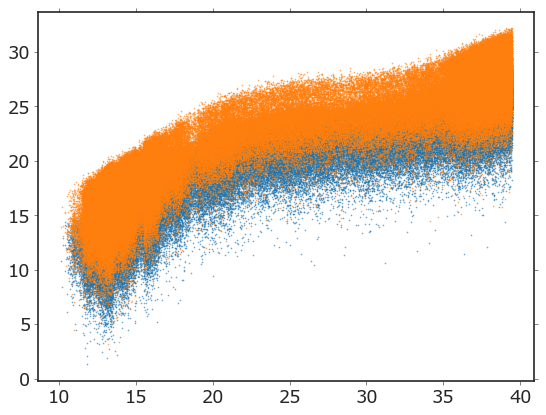

In [6]:
#%%prun
p.add_kinematics(footprint.ra.degree, footprint.dec.degree, kind='thin_disk', red_prop_motions_keys=keys)
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
_ =ax.scatter(p.spt, p.redH_LSST_Z, s=0.1)
p.add_kinematics(footprint.ra.degree, footprint.dec.degree, kind='halo', red_prop_motions_keys=keys)
_ =ax.scatter(p.spt, p.redH_LSST_Z, s=0.1)

In [7]:
fsfg

NameError: name 'fsfg' is not defined

In [ ]:
asf

In [ ]:
p.visualize(keys=['spt', 'temperature', 'abs_LSST_G', 'distance'])

In [ ]:
ls=np.random.uniform(0, np.pi/2, 10)
bs=np.random.uniform(0, np.pi/2, 10)

drange={15: [0.1, 1000], 20: [0.1, 2000]}

In [ ]:
#%%prun
p.assign_distance_from_spt_ranges(disk, ls, bs, drange)
#add magnitudes from pre-defined filters or pre-define polynomial cofficients
p.add_magnitudes(keys, get_from='spt')
p.visualize(keys=['spt', 'temperature', 'abs_LSST_G', 'distance'])
p.add_kinematics(footprint.ra.degree, footprint.dec.degree, kind='halo', red_prop_motions_keys=keys)
